In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [13]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [14]:
df = pd.read_csv("./diabetes.csv")

## CATBOOST

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.30,
                                                   random_state=42)

In [17]:
catb_model=CatBoostClassifier().fit(X_train,y_train,verbose=False)

In [18]:
y_pred=catb_model.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

0.7402597402597403

In [20]:
catb_params = {"iterations":[200,500,1000],
                "learning_rate":[0.1,0.01,0.001],
                "depth":[4,5,8]}

In [21]:
catb_cv_model=GridSearchCV(catb_model,catb_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train,verbose=False)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.5min finished


In [22]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [23]:
catb_tuned=CatBoostClassifier(depth=8,iterations=200,learning_rate=0.01).fit(X_train,y_train)

0:	learn: 0.6863412	total: 4.69ms	remaining: 933ms
1:	learn: 0.6811322	total: 7.84ms	remaining: 776ms
2:	learn: 0.6753199	total: 10.9ms	remaining: 719ms
3:	learn: 0.6697717	total: 14.2ms	remaining: 695ms
4:	learn: 0.6642090	total: 18.9ms	remaining: 738ms
5:	learn: 0.6577038	total: 23.2ms	remaining: 749ms
6:	learn: 0.6522290	total: 29.5ms	remaining: 813ms
7:	learn: 0.6466015	total: 33.6ms	remaining: 806ms
8:	learn: 0.6408068	total: 38.1ms	remaining: 809ms
9:	learn: 0.6358218	total: 41.7ms	remaining: 792ms
10:	learn: 0.6300444	total: 45.2ms	remaining: 776ms
11:	learn: 0.6240992	total: 60ms	remaining: 940ms
12:	learn: 0.6196618	total: 63.5ms	remaining: 913ms
13:	learn: 0.6149237	total: 67.1ms	remaining: 892ms
14:	learn: 0.6093146	total: 70ms	remaining: 864ms
15:	learn: 0.6047282	total: 72.9ms	remaining: 838ms
16:	learn: 0.6013242	total: 75.6ms	remaining: 814ms
17:	learn: 0.5958624	total: 79.3ms	remaining: 802ms
18:	learn: 0.5903733	total: 82.5ms	remaining: 786ms
19:	learn: 0.5866505	total

In [24]:
y_pred = catb_tuned.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.7532467532467533

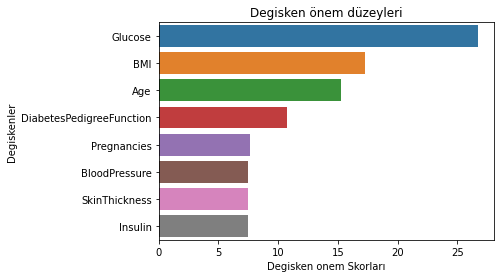

In [26]:
feature_imp = pd.Series(catb_tuned.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Degisken onem Skorları')
plt.ylabel('Degiskenler')
plt.title("Degisken önem düzeyleri")
plt.show()